In [3]:
from sklearn import metrics
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 28, 28)
(10000, 28, 28)


In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_test_dt = clf.predict(X_test)

#save model to file
from sklearn.externals import joblib
joblib.dump(clf, 'fashion-mnist-model.pkl') 

print(metrics.accuracy_score(y_test, y_test_dt))
print(metrics.confusion_matrix(y_test, y_test_dt))


0.7929
[[748   3  23  37  14   1 162   1  10   1]
 [  6 947   5  22   7   0  10   0   2   1]
 [ 22   1 654  15 152   0 141   0  12   3]
 [ 53  25  22 785  55   1  46   2  11   0]
 [  9   4 169  52 642   0 119   0   5   0]
 [  2   4   0   0   1 884   3  57  19  30]
 [136   8 134  39  98   5 559   1  17   3]
 [  0   0   0   0   0  43   0 890   7  60]
 [  9   2  16   3  15  12  22   5 913   3]
 [  0   0   0   0   1  22   0  64   6 907]]


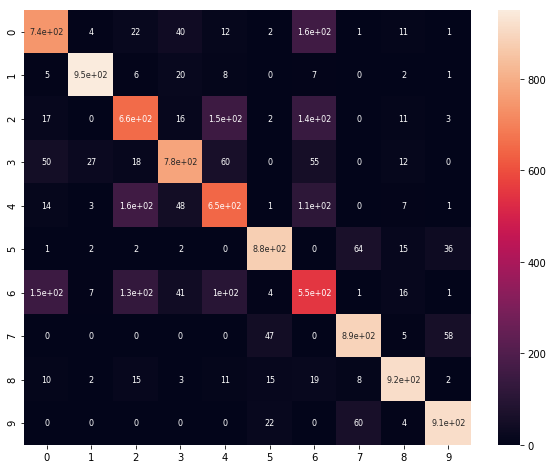

In [56]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotter(test, output):
    array = metrics.confusion_matrix(test, output)
    df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])
    plt.figure(figsize = (10,8))
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})
    plt.savefig('confusion_matrix.png', dpi=600)
    plt.show()
    
plotter(y_test, y_test_dt)